## Multiple Linear Regression

### Problem Statement :

#### **A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.**
**They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:**

- _Which variables are significant in predicting the demand for shared bikes._
- _How well those variables describe the bike demands_


In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading the data and Understanding the data

In [309]:
# Reading the data
bike_data = pd.read_csv("day.csv")

#Checking the data
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## This dataset has 730 Rows and 16 Columns

In [310]:
# Shape of the data
bike_data.shape

(730, 16)

In [311]:
# Checking info like type, Not null
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [312]:
# Total size of the dataset
bike_data.size

11680

In [313]:
# Describe detailed info about the dataset
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



## Data Cleaning Section

- Check for Missing values

- Drop the not so important columns like,
    - instant --- This is record index
    - dteday --- Dates are already there like yr, month, weekday
    - casual and registered --- cnt is there as sum of casual and registered

In [314]:
# Missing values
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [315]:
# Dropping non significant columns 
bike_data.drop(['instant'], axis =1, inplace= True)
bike_data.drop(['dteday'],axis =1, inplace= True)
bike_data.drop(['casual'],axis =1, inplace= True)
bike_data.drop(['registered'],axis =1, inplace= True)

In [316]:
# Verifying data after dropping columns
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Handling Outliers

In [317]:
# Checking for unique values in the dataset
bike_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

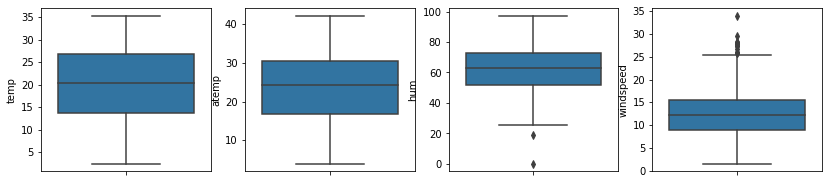

In [318]:
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(14,3))
i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_data)
    i+=1

### From the above plot we can see that we don't have any outliers

### Perform EDA

In [319]:
# Establishing Corelation
bike_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


#### From the above corelation it's clear that couple of non numerical fields like mnth, weekday and season are numerical. So we need to convert that.

In [320]:
# Changing data from numeric to something more meaningful 

bike_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)

bike_data.weathersit.replace({1:'good_weather',2:'moderate_weather',3:'bad_weather',4:'severe_weather'}, inplace = True)

bike_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)

bike_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)

#Checking the data again
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate_weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate_weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good_weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good_weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good_weather,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualization

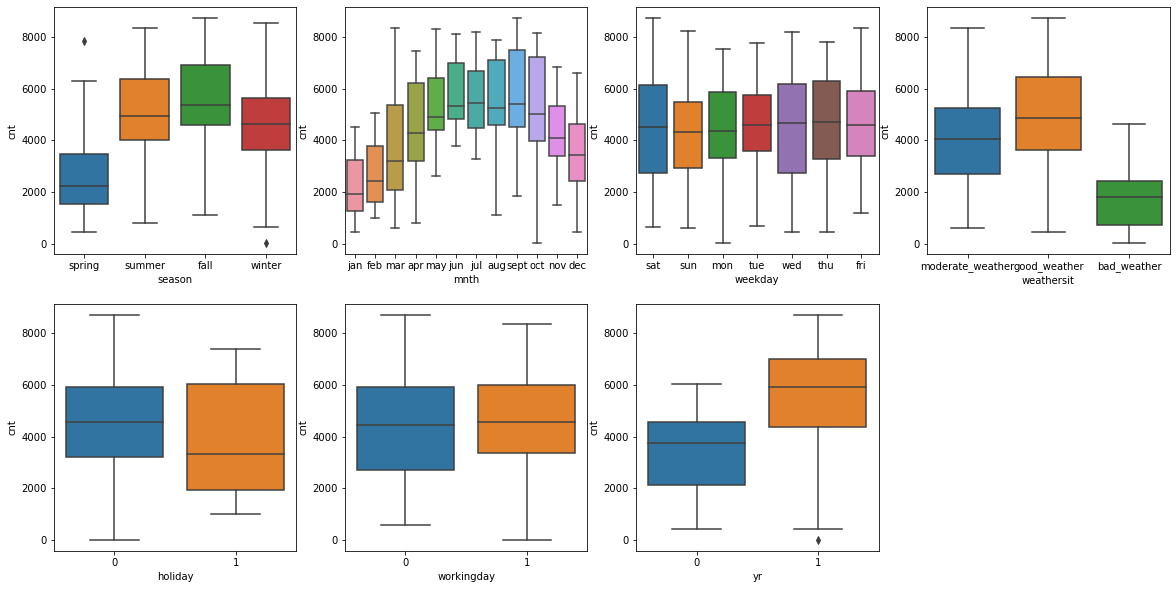

In [321]:
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data )
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data )
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data )
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data )
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data )
plt.show()

### Visualization of categorical columns through bar plot

In [322]:
def cate_col_bar_plt(column):
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bike_data)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bike_data, hue='yr',palette='tab20_r')
    plt.legend(labels=['2018', '2019'])
    plt.show()

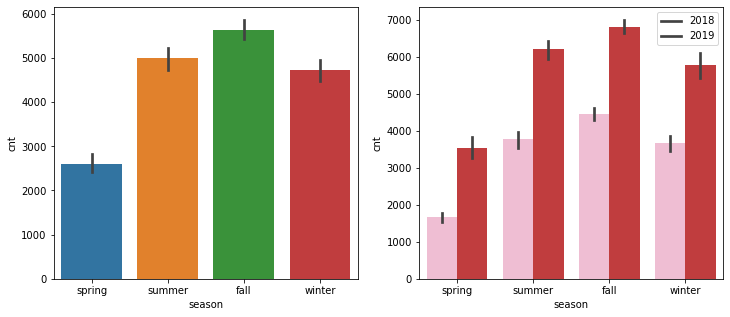

In [323]:
cate_col_bar_plt('season')

*We can observe max demand in Fall season, may be because of pleasant weather condition*

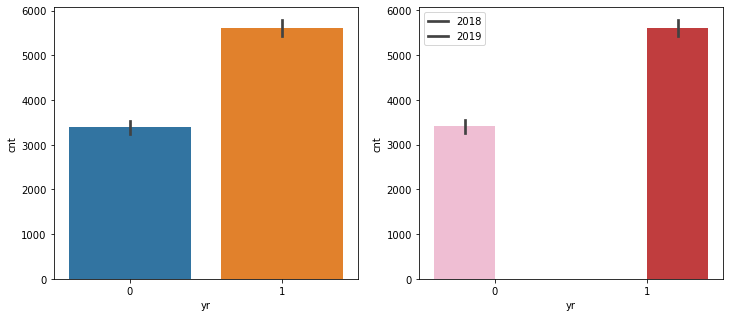

In [324]:
cate_col_bar_plt('yr')

*We can observe increased demand in 2019, which signifies progress in business*

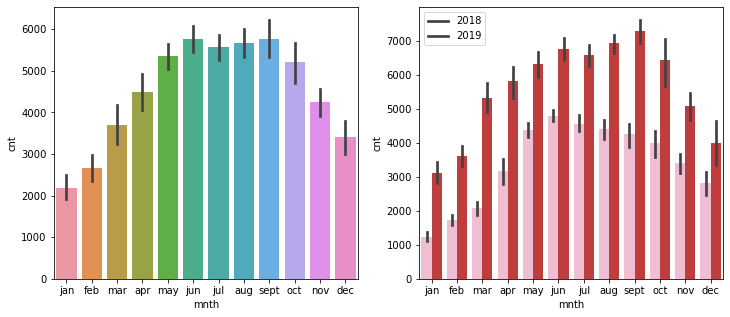

In [325]:
cate_col_bar_plt('mnth')

*We can observe varying demand across the months, may be because of different weather condition*

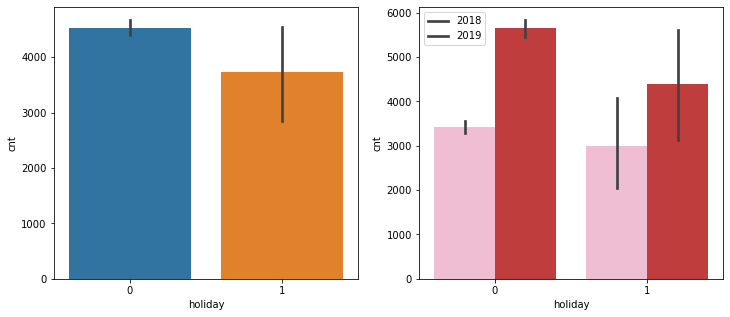

In [326]:
cate_col_bar_plt('holiday')

*Demand in holiday seems to be more as people might have more time to use the bike*

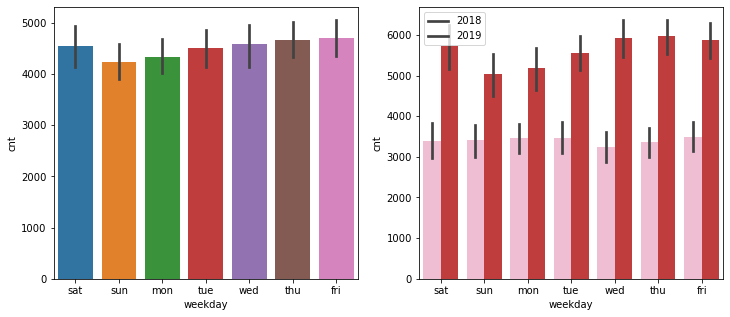

In [327]:
cate_col_bar_plt('weekday')

*There is a slight increase in demand towards the weekend and demand increased from 2018 to 2019*

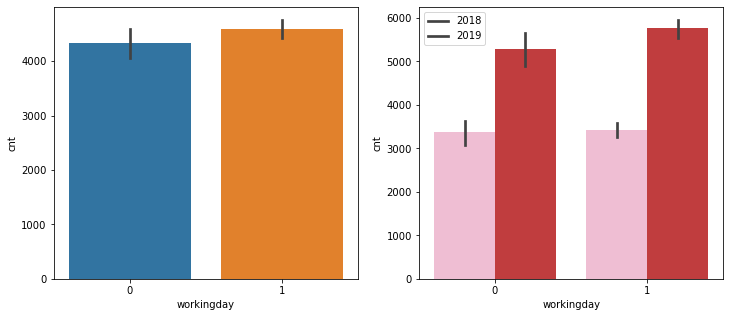

In [328]:
cate_col_bar_plt('workingday')

*Demand significantly increased from 2018 to 2019, while not much difference in demand between weekday and weekend*

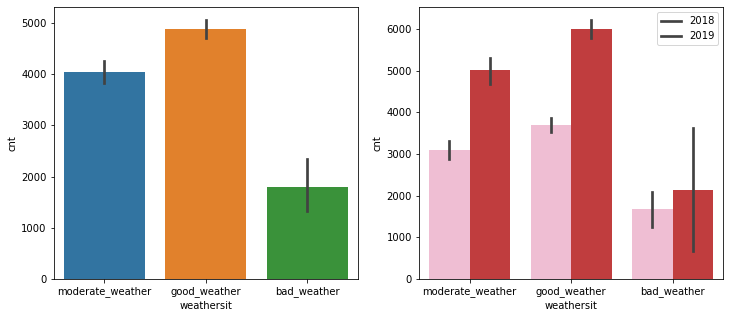

In [329]:
cate_col_bar_plt('weathersit')

*Good weather condition is attracting more demand, which is for obvious reasons*

*Demand in 2019 has increased from 2018 irrespective of weather condition*

### Pairplot : To check linear relationship

<Figure size 864x1800 with 0 Axes>

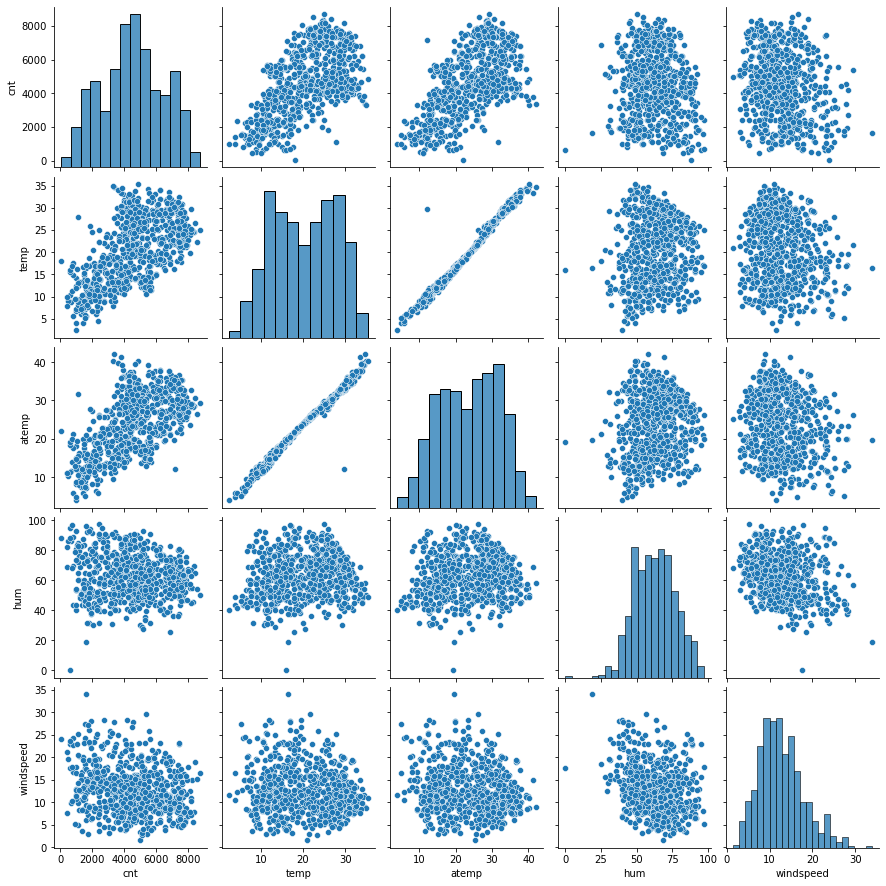

In [330]:
plt.figure(figsize = (12,25))
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])

plt.show()

### Heatmap image

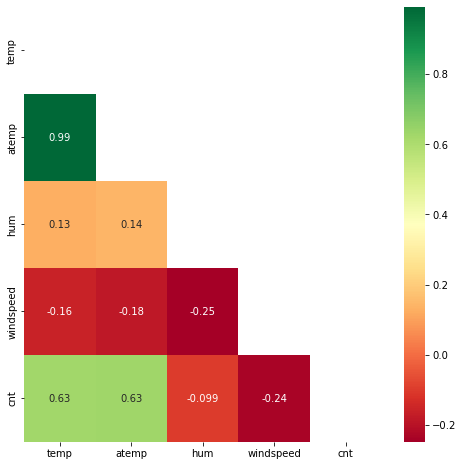

In [331]:
# Checking for correlation between numerical variables
plt.figure(figsize = (8,8))
matrix = np.triu(bike_data[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bike_data[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

##### From the above plots we can observe a linerar relationship between temp and atemp, but can not be used in the model due to their multi colinear behavior

## Data Preparation for Model Building

In [332]:
bike_data = pd.get_dummies(data=bike_data,columns=["season","mnth","weekday"],drop_first=True)
bike_data = pd.get_dummies(data=bike_data,columns=["weathersit"])
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad_weather,weathersit_good_weather,weathersit_moderate_weather
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


## Splitting the Data into Train Test Set

In [333]:
#y to contain target variable

y=bike_data.pop('cnt')

#X is all remainign variable
X=bike_data

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad_weather,weathersit_good_weather,weathersit_moderate_weather
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [334]:
# scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

# Using Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [335]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad_weather,weathersit_good_weather,weathersit_moderate_weather
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.483366,0.023483,0.706458,0.552390,0.544999,0.644967,0.317738,0.244618,0.254403,0.252446,...,0.064579,0.152642,0.135029,0.135029,0.144814,0.150685,0.138943,0.031311,0.626223,0.342466
std,0.500213,0.151581,0.455831,0.230467,0.223170,0.149518,0.167252,0.430282,0.435952,0.434842,...,0.246023,0.359994,0.342090,0.342090,0.352258,0.358092,0.346226,0.174328,0.484280,0.474999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.345523,0.524903,0.197851,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.551893,0.555450,0.650064,0.294759,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.731772,0.752469,0.406464,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


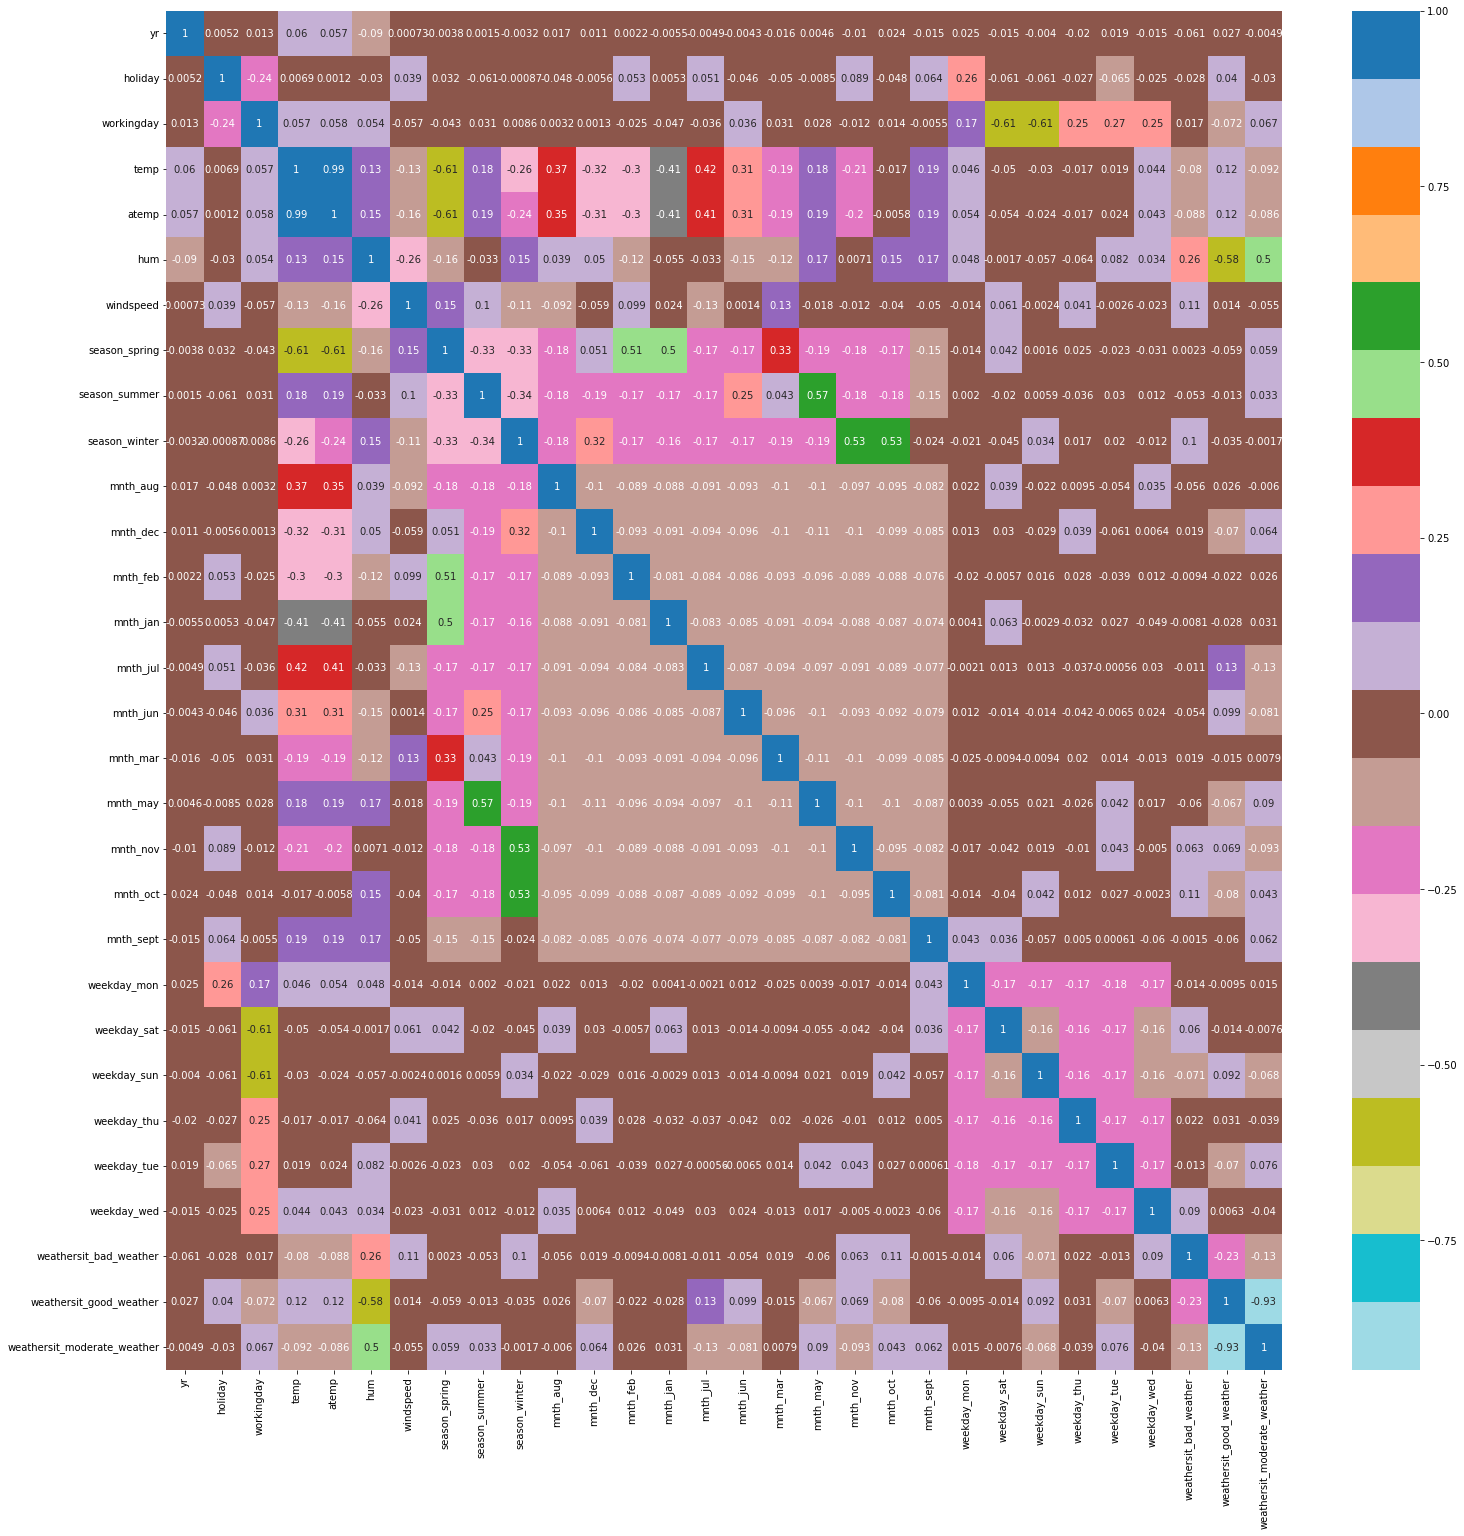

In [336]:
plt.figure(figsize = (25,25))
sns.heatmap(X_train.corr(), annot = True, cmap="tab20_r")
plt.show()

## Model using RFE

In [337]:
lr = LinearRegression()
lr.fit(X_train,y_train)

#Minimize number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [338]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 14),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 3),
 ('mnth_jul', False, 4),
 ('mnth_jun', False, 8),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', False, 9),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_bad_weather', True, 1),
 ('weathersit_good_weather', True, 1),
 ('weathersit_moderate_weather', True, 1)]

In [339]:
#Function to build a model 
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [340]:
#Function to calculate VIFs using columns for which VIF to be calcualted as parameter

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [341]:
#Columns selected by RFE to manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_nov', 'mnth_sept',
       'weathersit_bad_weather', 'weathersit_good_weather',
       'weathersit_moderate_weather'],
      dtype='object')

In [342]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [343]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad_weather', 'weathersit_moderate_weather']]

## Model : 1

In [344]:
#Selected columns for Model : 1 ---> all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad_weather', 'weathersit_moderate_weather']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     187.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.93e-193
Time:                        22:30:10   Log-Likelihood:                -4108.5
No. Observations:                 511   AIC:                             8249.
Df Residuals:                     495   BIC:                             8317.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Model : 2

In [345]:
# Dropping variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value

cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad_weather', 'weathersit_moderate_weather']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     200.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.42e-193
Time:                        22:30:11   Log-Likelihood:                -4109.4
No. Observations:                 511   AIC:                             8249.
Df Residuals:                     496   BIC:                             8312.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Model : 3

In [346]:
# Dropping variable hum as it has negative coefficient and is insignificant as it has high p-value

cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad_weather', 'weathersit_moderate_weather']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.13e-187
Time:                        22:30:11   Log-Likelihood:                -4128.2
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     497   BIC:                             8344.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Model : 4

In [347]:
# Dropping variable holiday as it has negative coefficient and is insignificant as it has high p-value

cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad_weather', 'weathersit_moderate_weather']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.09e-187
Time:                        22:30:11   Log-Likelihood:                -4129.0
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     498   BIC:                             8339.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [348]:
 # Dropping variable mnth_jul,temp as it has negative coefficient and is insignificant as it has high p-value
    
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad_weather', 'weathersit_moderate_weather']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     232.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.16e-188
Time:                        22:30:11   Log-Likelihood:                -4130.1
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     499   BIC:                             8335.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Model : 6

In [349]:
# Replacing July with spring as both are highly correlated and adding temp and removing working_day,Summer

cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad_weather', 'weathersit_moderate_weather','temp']

build_model(cols6)
get_vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          7.83e-181
Time:                        22:30:11   Log-Likelihood:                -4153.7
No. Observations:                 511   AIC:                             8327.
Df Residuals:                     501   BIC:                             8370.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

*Here VIF seems to be acceptable. p-value for all the features is almost 0.0 and R2 is 0.821*

*Hence we can finalize this model*

In [350]:
#Build a model with all columns to select features automatically

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [351]:
#Now build the final model

lr = build_model_sk(X_train[cols6],y_train)
print(lr.intercept_,lr.coef_)

1742.794631299998 [ 2041.43042684 -1038.75568497  -363.35215351   465.04324464
   342.53796988  -304.79095968 -2458.15214991  -645.57252002
  3999.76963287]


## Perform Residual Analysis

In [352]:
y_train_pred = lr.predict(X_train[cols6])

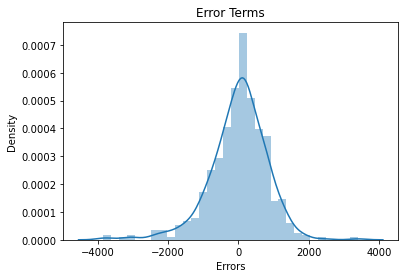

In [353]:
# Plot a histogram of the error terms

def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

plot_res_dist(y_train, y_train_pred)

##  Actual vs Prediction

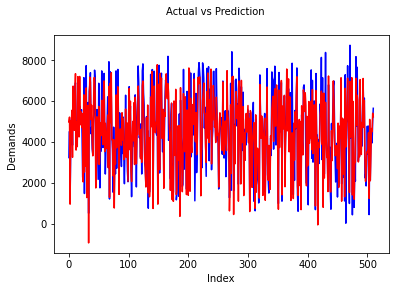

In [354]:
x = [i for i in range(0,len(X_train),1)]
plt.plot(x,y_train, color="blue")
plt.plot(x,y_train_pred, color="red")
plt.suptitle('Actual vs Prediction', fontsize = 10)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Model Prediction

### R-Squared

In [355]:
r2_score(y_train,y_train_pred)

0.8209854756210654

## R-Squared value for test predictions

In [356]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad_weather', 'weathersit_moderate_weather','temp']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols6])

r2_score(y_test,y_test_pred)

0.8090369902280027

## Model Evaluation

In [357]:
# Evaluating the model based on r2_score
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8090369902280027

Text(0, 0.5, 'y_pred')

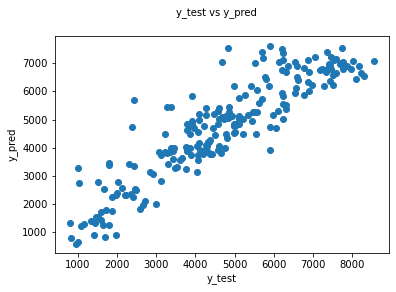

In [358]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 10)             
plt.xlabel('y_test', fontsize = 10)                          
plt.ylabel('y_pred', fontsize = 10) 

In [359]:
# Rebuild the final model of manual + rfe approach 

cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad_weather', 'weathersit_moderate_weather','temp']

lm = build_model(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          7.83e-181
Time:                        22:30:11   Log-Likelihood:                -4153.7
No. Observations:                 511   AIC:                             8327.
Df Residuals:                     501   BIC:                             8370.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.820
- Test dataset R^2           : 0.809

#### Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year
- Sunday
- weathersituation like ( Light Snow, Mist + Cloud)